# Projek 1
## Temat:
#### Wykonaj wykresy czasowe w formie interaktywnej z możliwością wyboru co najmniej dwóch serii danych na wykresie. Dla danych wykonaj wizualizację braków danych. Uzasadnij wybrane narzędzia, zinterpretuj rezultaty prac.
#### Alicja Osam-Gyaabin, Mijołaj Zawada, Karol Kociołek

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Select, CustomJS, Slider, PreText, Legend
import matplotlib.pyplot as plt
import random
import missingno as msno

In [2]:
df = pd.read_csv('cleaned_weather.csv')
df['date'] = pd.to_datetime(df['date'])

In [3]:
source = ColumnDataSource(df)

TITLE = 'weather'
output_file(TITLE + ".html")

p = figure(width=1400, height=900, x_axis_type='datetime', title=TITLE)
p.toolbar.logo = "grey"
p.background_fill_color = "#dddddd"
p.xaxis.axis_label = "Datetime"
p.grid.grid_line_color = "white"

line1 = p.line(x='date', y='p', source=source, legend_label='Zmienna 1', color='red')
line2 = p.line(x='date', y='p', source=source, legend_label='Zmienna 2', color='blue')

ys = Select(title='Zmienna 1', value='p', options=df.columns.tolist()[1:])
zs = Select(title='Zmienna 2', value='p', options=df.columns.tolist()[1:])

callback1 = CustomJS(args=dict(source=source, p=p, line=line1, sel1=ys), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

callback2 = CustomJS(args=dict(source=source, p=p, line=line2, sel1=zs), code="""
    var data = source.data;
    var selected_col = sel1.value;
    
    // Aktualizowanie y w linii wykresu na podstawie wybranej kolumny
    line.glyph.y = {field: selected_col};
    
    source.change.emit();
""")

ys.js_on_change('value', callback1)
zs.js_on_change('value', callback2)

controls = column(ys, zs)
layout = row(controls, p)

p.legend.click_policy = 'hide'

show(layout)

In [4]:
columns_to_modify = df.columns[df.columns != 'date']

selected_columns = random.sample(list(columns_to_modify), 5)

def introduce_missing_values(df, selected_columns, min_weeks=1, max_weeks=4):
    for col in selected_columns:
        num_missing = random.randint(min_weeks, max_weeks) * 7 * 24 * 60 // 10
        
        start_idx = random.randint(0, len(df) - num_missing)
        
        df.loc[start_idx:start_idx + num_missing - 1, col] = np.nan
        
    return df

df2 = introduce_missing_values(df.copy(), selected_columns)
columns_to_modify = df2.columns[df2.columns != 'date']

for column in columns_to_modify:
    nan_indices = np.random.choice(df2.index, size=int(0.15 * len(df2)), replace=False)
    df2.loc[nan_indices, column] = np.nan

In [5]:
(df2.isna().sum()/len(df2))*100

date         0.000000
p           14.999241
T           14.999241
Tpot        14.999241
Tdew        14.999241
rh          18.242371
VPmax       14.999241
VPact       14.999241
VPdef       14.999241
sh          14.999241
H2OC        14.999241
rho         14.999241
wv          14.999241
max. wv     14.999241
wd          14.999241
rain        18.210111
raining     18.248064
SWDR        16.619857
PAR         21.464627
max. PAR    14.999241
Tlog        14.999241
dtype: float64

<Axes: >

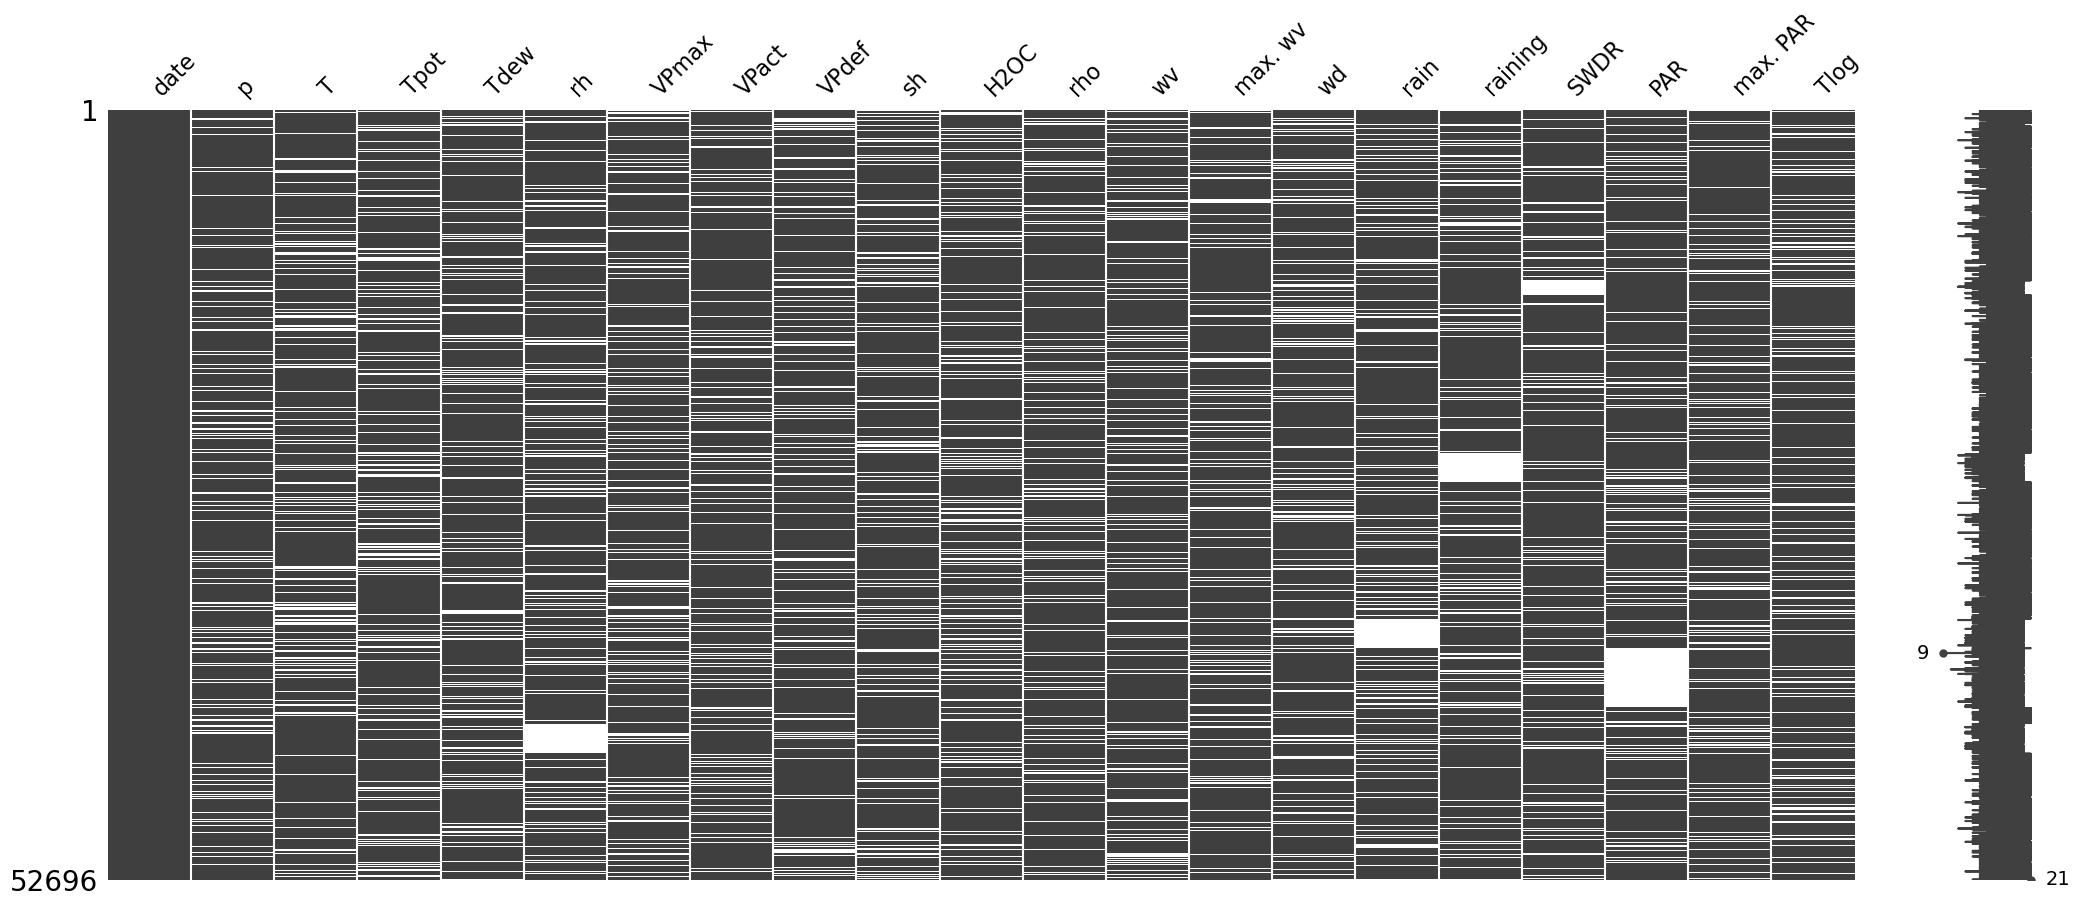

In [6]:
msno.matrix(df2)

<Axes: >

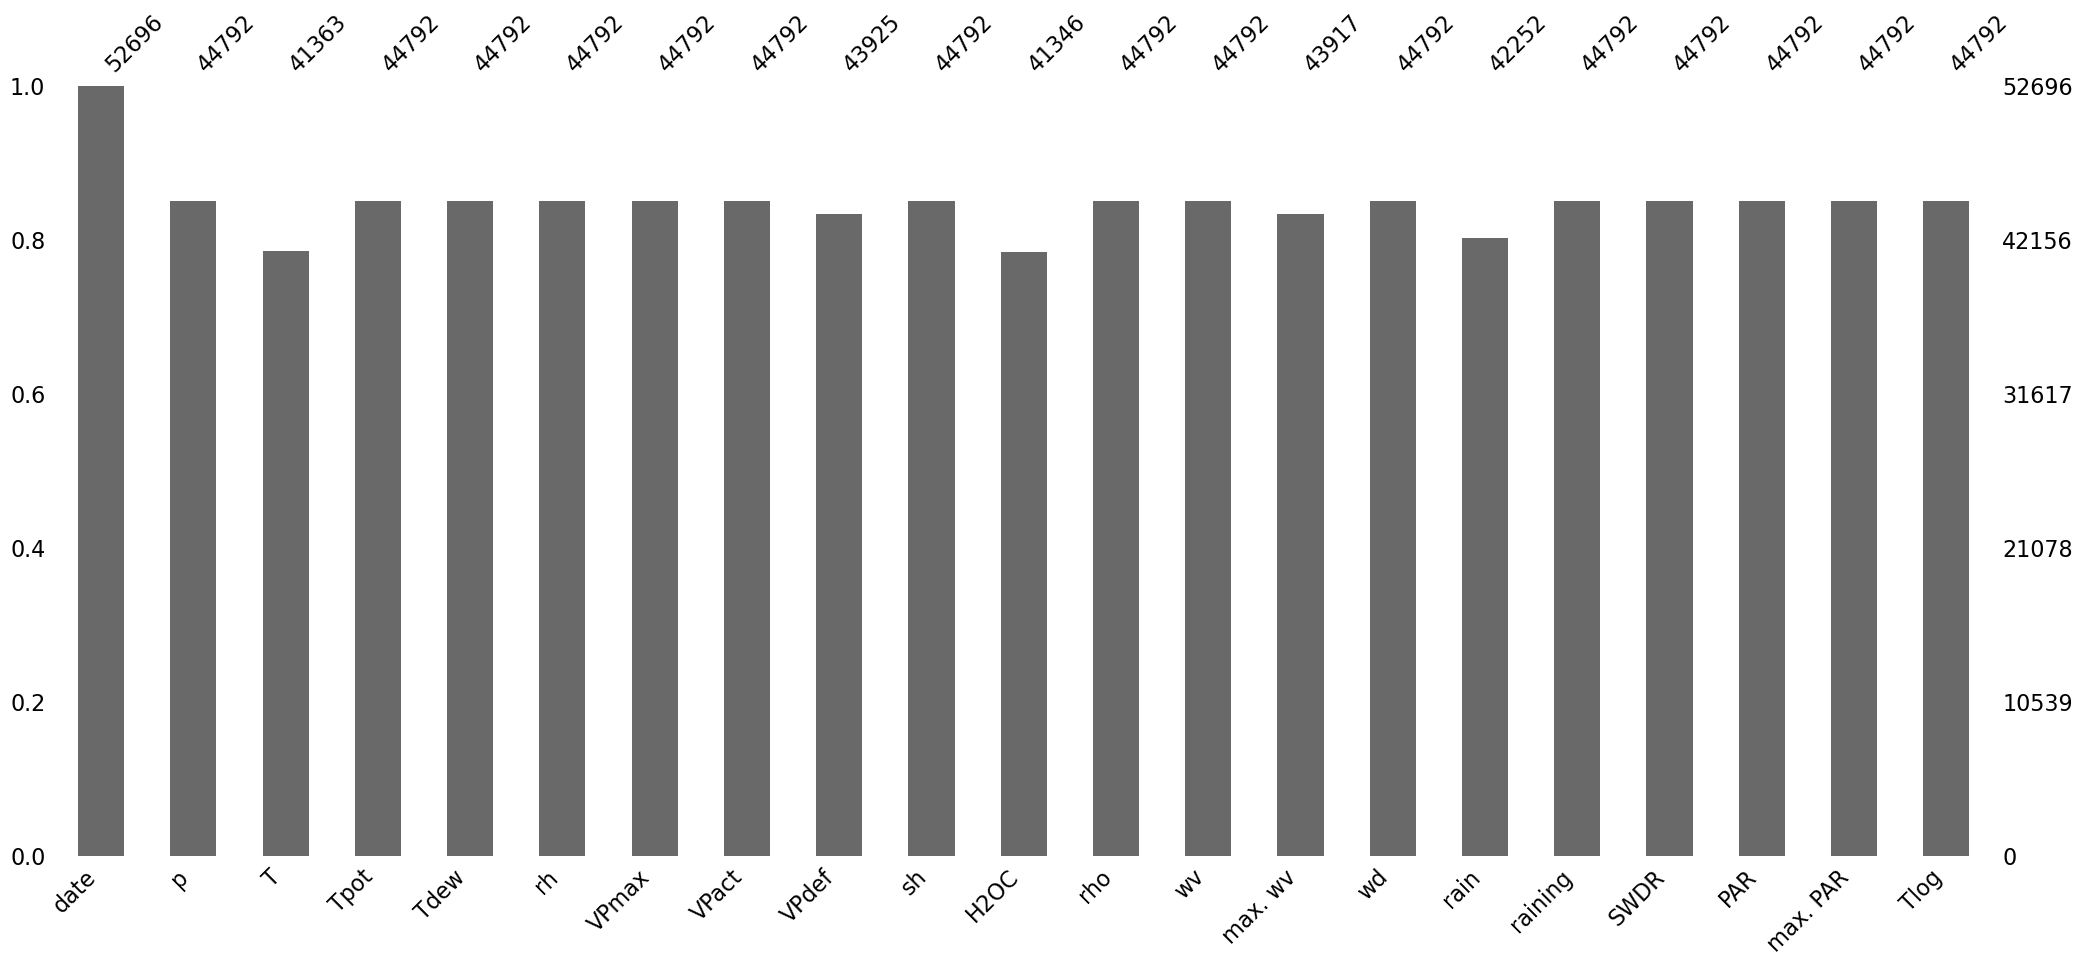

In [10]:
msno.bar(df2)

In [19]:
df3 = df2.style.highlight_null(props="background-color: yellow;")

with pd.ExcelWriter('nuls.xlsx', engine='openpyxl') as writer:
    df3.to_excel(writer, index=False, sheet_name='Sheet1')